# Homework 14 


1. Fit a single classification or regression tree on the Titanic data using only Sex and Pclass as features
2. Compute and plot the SHAP values (beeswarm, force and dependence plots).
    * How do the interactions manifest themselves ?
    * Compute a measure of global feature importance
3. In today´s lecture I somewhat flippantly stated that "boxplots would have been a perfectly fine alternative to beeswarm or violin plots but that they were not sexy enough". On second thoughts that statement is not entirely true. Can you think of a major advantage of beeswarm plots for situations that are quite common in feature attribution scores ?

In [43]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import shap
import interpret.glassbox

from sklearn.tree import DecisionTreeClassifier, plot_tree

from sklearn.inspection import PartialDependenceDisplay

In [3]:
df = pd.read_csv('../data/TitanicTrain.csv') # Load the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [13]:
X = pd.concat([pd.get_dummies(df[["Sex"]], drop_first=True), df[["Pclass"]]], axis=1)
y = df.Survived

## Fit a single classification or regression tree on the Titanic data using only Sex and Pclass as features

In [15]:
tree = DecisionTreeClassifier().fit(X,y)

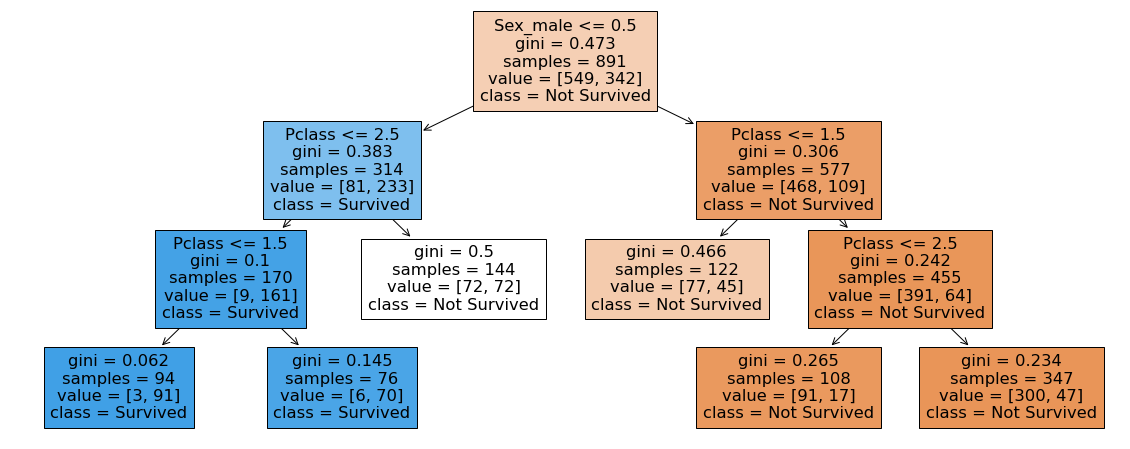

In [37]:
fig, ax = plt.subplots(1,1, figsize=(20,8))
plot_tree(tree, feature_names=X.columns, class_names=["Not Survived", "Survived"], filled=True, ax=ax);

## Compute and plot the SHAP values (beeswarm, force and dependence plots).
* How do the interactions manifest themselves ?
* Compute a measure of global feature importance

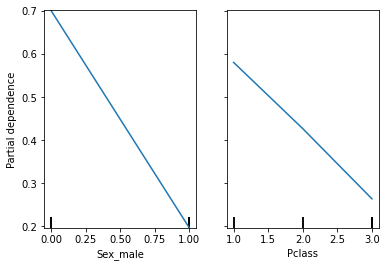

In [42]:
# Dependence plots
PartialDependenceDisplay.from_estimator(tree, X, features=[0,1]);

In [51]:
import interpret.glassbox
tree_ebm = interpret.glassbox.ClassificationTree()
tree_ebm.fit(X,y);

In [52]:
# explain the GAM model with SHAP
explainer_ebm = shap.Explainer(tree_ebm.predict, X)
shap_values_ebm = explainer_ebm(X)

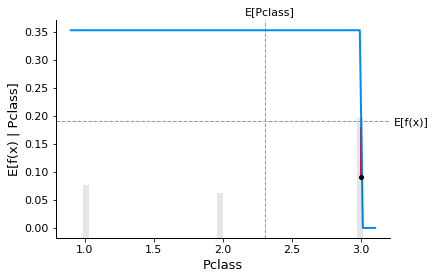

In [55]:
# make a standard partial dependence plot with a single SHAP value overlaid
fig,ax = shap.partial_dependence_plot(
    "Pclass", tree_ebm.predict, X, model_expected_value=True,
    feature_expected_value=True, show=False, ice=False,
    shap_values=shap_values_ebm[0:1,:]
)

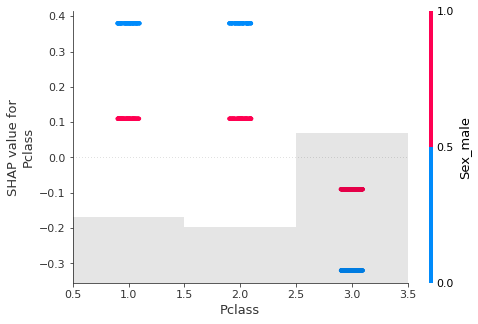

In [60]:
shap.plots.scatter(shap_values_ebm[:,"Pclass"], color=shap_values_ebm)

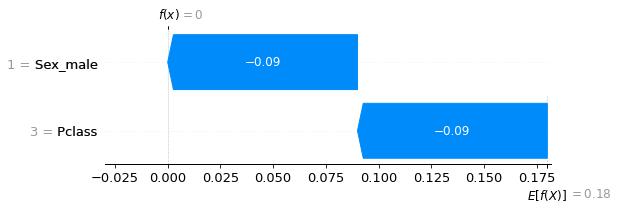

In [57]:
shap.plots.waterfall(shap_values_ebm[0], max_display=2)

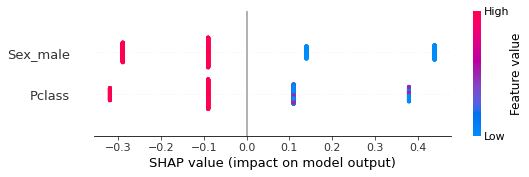

In [59]:
shap.plots.beeswarm(shap_values_ebm, max_display=2)

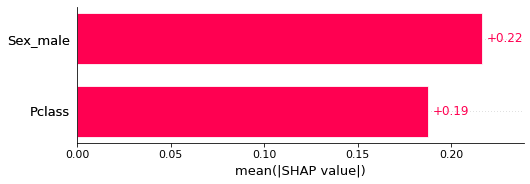

In [62]:
shap.plots.bar(shap_values_ebm)

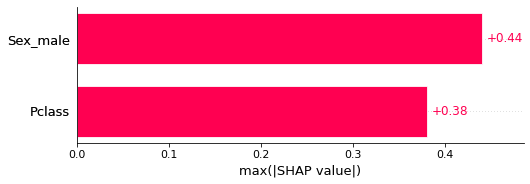

In [63]:
shap.plots.bar(shap_values_ebm.abs.max(0))

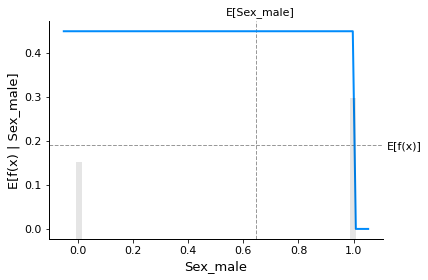

In [47]:
shap.plots.partial_dependence(
    "Sex_male", tree.predict, X, ice=False,
    model_expected_value=True, feature_expected_value=True
)

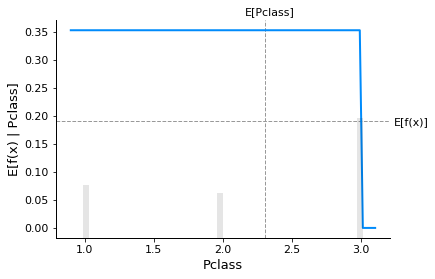

In [48]:
shap.plots.partial_dependence(
    "Pclass", tree.predict, X, ice=False,
    model_expected_value=True, feature_expected_value=True
)

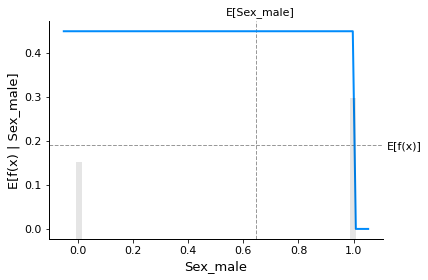

In [49]:
# explain the GAM model with SHAP
explainer_tree = shap.Explainer(tree, X)
shap_values = explainer_tree(X)

# make a standard partial dependence plot with a single SHAP value overlaid
fig,ax = shap.partial_dependence_plot(
    "Sex_male", tree.predict, X, model_expected_value=True,
    feature_expected_value=True, show=False, ice=False
)

## Beeswarm vs. boxplot
In today´s lecture I somewhat flippantly stated that "boxplots would have been a perfectly fine alternative to beeswarm or violin plots but that they were not sexy enough". On second thoughts that statement is not entirely true. Can you think of a major advantage of beeswarm plots for situations that are quite common in feature attribution scores ?

- See distributions of values is not so easy in boxplots 